In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
clean_df = pd.read_csv('Resources/Final_Clean.csv')

In [4]:
clean_df.head()
clean_df = clean_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [5]:
clean_df.head()

,NPA,year,Petitioner,FromZone,ToZone,Type,SPA,INNOV,Acres,Water,...,student_absenteeism,voters_participating,neighborhood_organizations,voter_participation,vacant_land,population_density,population,transit_ridership,street_connectivity,bicycle_friendliness
0,2,2020,Alenky Signature Homes LLC,R-4,R-8,NC,no,NO,0.398,CMUD,...,12.666667,756.333333,2.0,61.333333,4.3,5.0,2240.0,43.0,1.2,1.5
1,2,2019,Mark Heisig,O-2,R-4,NC,no,NO,0.330,CMUD,...,12.666667,756.333333,2.0,61.333333,4.3,5.0,2240.0,43.0,1.2,1.5
2,2,2014,"Eastway II Holdings, LLC",BD(CD),BD(CD),CD,SPA,NO,3.050,CMUD,...,11.500000,603.000000,2.0,54.000000,4.3,5.0,2240.0,43.0,1.2,1.5
3,2,2014,"Eastway II Holdings, LLC",B-1SCD,BD(CD),CD,no,NO,3.740,CMUD,...,11.500000,603.000000,2.0,54.000000,4.3,5.0,2240.0,43.0,1.2,1.5
4,2,2016,"Dr. Michael Berglass, DDS",UR-C(CD),UR-C(CD),CD,SPA,NO,0.440,CMUD,...,15.000000,1063.000000,2.0,76.000000,4.3,5.0,2240.0,43.0,1.2,1.5


In [6]:
clean_df.dtypes
clean_df.count()


NPA                               1757
year                              1757
Petitioner                        1756
FromZone                          1757
ToZone                            1756
Type                              1756
SPA                               1755
INNOV                             1678
Acres                             1757
Water                             1735
Sewer                             1736
CityLimit                         1748
CCW                               1715
ServiceArea                       1712
LuseStaff                         1705
UrbanDesign                       1713
RezoneStaff                       1662
Received                          1751
Approved                          1600
Decision                          1754
births_to_adolescents             1757
grocery_proximate_units           1757
prenatal_care                     1757
grocery_proximity                 1757
low_birthweight                   1757
public_health_insurance  

In [7]:
column_names = list(clean_df.columns.values)
print(column_names)
len(column_names)

['NPA', 'year', 'Petitioner', 'FromZone', 'ToZone', 'Type', 'SPA', 'INNOV', 'Acres', 'Water', 'Sewer', 'CityLimit', 'CCW', 'ServiceArea', 'LuseStaff', 'UrbanDesign', 'RezoneStaff', 'Received', 'Approved', 'Decision', 'births_to_adolescents', 'grocery_proximate_units', 'prenatal_care', 'grocery_proximity', 'low_birthweight', 'public_health_insurance', 'age_of_death', 'impervious_surface', 'water_consumption', 'neighborhood_school_attendance', 'highschool_graduation_rate', 'proficiency_elementary_school', 'proficiency_middle_school', 'proficiency_high_school', 'student_absenteeism', 'voters_participating', 'neighborhood_organizations', 'voter_participation', 'vacant_land', 'population_density', 'population', 'transit_ridership', 'street_connectivity', 'bicycle_friendliness']


44

In [8]:
#catagorical_columns drop 'Decision', which will be our Target
catagorical_columns = ['NPA', 'year', 'Petitioner', 'FromZone', 'ToZone', 'Type', 'SPA', 'INNOV', 'Water', 'Sewer', 'CityLimit', 'CCW', 'ServiceArea', 'LuseStaff', 'UrbanDesign', 'RezoneStaff', 'Received', 'Approved']
numberic_columns = ['Acres', 'births_to_adolescents', 'grocery_proximate_units', 'prenatal_care', 'grocery_proximity',
                  'low_birthweight', 'public_health_insurance', 'age_of_death', 'impervious_surface',
                  'water_consumption', 'neighborhood_school_attendance', 'highschool_graduation_rate', 
                   'proficiency_elementary_school', 'proficiency_middle_school', 'proficiency_high_school',
                   'student_absenteeism', 'voters_participating', 'neighborhood_organizations',
                   'voter_participation', 'vacant_land', 'population_density', 'population', 'transit_ridership',
                   'street_connectivity', 'bicycle_friendliness']
all_columns = ['NPA', 'year', 'Petitioner', 'FromZone', 'ToZone', 'Type', 'SPA', 'INNOV', 'Acres', 'Water', 'Sewer', 'CityLimit', 'CCW', 'ServiceArea', 'LuseStaff', 'UrbanDesign', 'RezoneStaff', 'Received', 'Approved', 'Decision', 'births_to_adolescents', 'grocery_proximate_units', 'prenatal_care', 'grocery_proximity', 'low_birthweight', 'public_health_insurance', 'age_of_death', 'impervious_surface', 'water_consumption', 'neighborhood_school_attendance', 'highschool_graduation_rate', 'proficiency_elementary_school', 'proficiency_middle_school', 'proficiency_high_school', 'student_absenteeism', 'voters_participating', 'neighborhood_organizations', 'voter_participation', 'vacant_land', 'population_density', 'population', 'transit_ridership', 'street_connectivity', 'bicycle_friendliness']



In [9]:
print(len(catagorical_columns))
print(len(numberic_columns))
print("______")
print(len(catagorical_columns)+len(numberic_columns))
print("______")
print(len(clean_df.columns))

18
25
______
43
______
44


In [10]:
y = clean_df[['Decision']]
y.fillna("UKN", inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(y)
label_encoder.classes_

array(['App', 'Def', 'Den', 'UKN', 'Wd'], dtype=object)

In [12]:
encoded_y = label_encoder.transform(y)

In [13]:
print(encoded_y)

[0 0 0 ... 0 0 0]


In [14]:
clean_drop_df = clean_df.drop(['Decision'], axis=1)

In [15]:
#Dummy Encode Catagorical Data

X = pd.get_dummies(clean_drop_df, columns=catagorical_columns)
X.head()

,Acres,births_to_adolescents,grocery_proximate_units,prenatal_care,grocery_proximity,low_birthweight,public_health_insurance,age_of_death,impervious_surface,water_consumption,...,Approved_2020/04/20 00:00:00+00,Approved_2020/05/18 00:00:00+00,Approved_2020/05/18 16:02:33+00,Approved_2020/05/18 16:18:00+00,Approved_2020/05/18 16:38:34+00,Approved_2020/05/18 16:38:48+00,Approved_2020/05/18 16:46:28+00,Approved_2020/05/18 16:48:49+00,Approved_2020/06/15 00:00:00+00,Approved_2020/07/20 00:00:00+00
0,0.398,3.166667,204.333333,70.466667,19.0,17.733333,13.0,68.666667,22.2,112.333333,...,0,0,0,0,0,0,0,0,0,1
1,0.330,3.166667,204.333333,70.466667,19.0,17.733333,13.0,68.666667,22.2,112.333333,...,0,0,0,0,0,0,0,0,0,0
2,3.050,1.400000,204.000000,75.700000,19.0,21.600000,13.0,68.000000,22.2,112.000000,...,0,0,0,0,0,0,0,0,0,0
3,3.740,1.400000,204.000000,75.700000,19.0,21.600000,13.0,68.000000,22.2,112.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.440,6.700000,205.000000,60.000000,19.0,10.000000,13.0,70.000000,22.2,113.000000,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(X.shape, encoded_y.shape)


(1757, 2076) (1757,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

print(X_train.head())
#print(y_train[0:5])

       Acres  births_to_adolescents  grocery_proximate_units  prenatal_care  \
1027  371.00                    3.9                 0.000000           65.4   
842     0.33                    4.6               242.666667           40.9   
757     1.25                    0.0                90.428571           50.6   
218     1.23                    2.8               109.000000           52.8   
1131   47.49                    0.0                 0.000000           85.7   

      grocery_proximity  low_birthweight  public_health_insurance  \
1027           0.000000              3.8                     22.0   
842           75.333333             18.2                     58.5   
757            8.571429             23.6                     39.0   
218           18.000000             13.9                     -1.0   
1131           0.000000              0.0                      1.0   

      age_of_death  impervious_surface  water_consumption  ...  \
1027          -1.0            2.400000      

In [76]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k: 1, Train/Test Score: 1.000/0.950
k: 3, Train/Test Score: 0.944/0.920
k: 5, Train/Test Score: 0.922/0.925
k: 7, Train/Test Score: 0.919/0.923
k: 9, Train/Test Score: 0.916/0.923
k: 11, Train/Test Score: 0.916/0.923
k: 13, Train/Test Score: 0.916/0.923
k: 15, Train/Test Score: 0.916/0.923
k: 17, Train/Test Score: 0.910/0.923
k: 19, Train/Test Score: 0.910/0.923


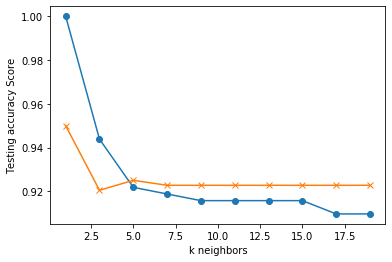

In [78]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [79]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.925
